In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-darkgrid')
import pandas as pd
import numpy as np
from datetime import datetime
import warnings
warnings.filterwarnings(action="ignore")

In [14]:
years = '2002-2024'
df = pd.read_csv('./data/' + years + '_all.csv', index_col=0)
df.tail(3)

,평균 수온(°C)
2023-12-29,15.3000
2023-12-30,14.4000
2023-12-31,14.3000


In [3]:
# converting column names from korean to english
df.rename(columns={'평균 수온(°C)':'temperature'}, inplace=True)
display(df)

,temperature
2002-01-01,12.9
2002-01-02,12.2
2002-01-03,11.9
2002-01-04,11.7
2002-01-05,11.7
...,...
2023-12-27,15.5
2023-12-28,15.2
2023-12-29,15.3
2023-12-30,14.4


In [4]:
pd.set_option('display.float_format', '{:.4f}'.format)
df.info()       # 다 채워서 이제 non-null 됨

<class 'pandas.core.frame.DataFrame'>
Index: 8035 entries, 2002-01-01 to 2023-12-31
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  8035 non-null   float64
dtypes: float64(1)
memory usage: 125.5+ KB


<Axes: >

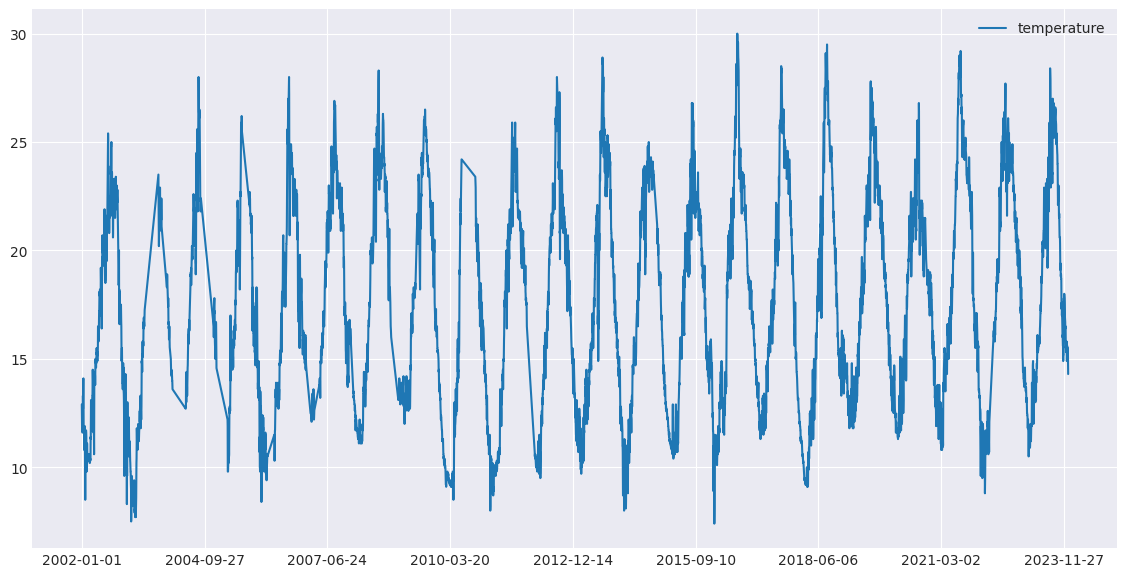

In [5]:
df.plot(figsize=(14, 7))

# ACF, PACF

In [9]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

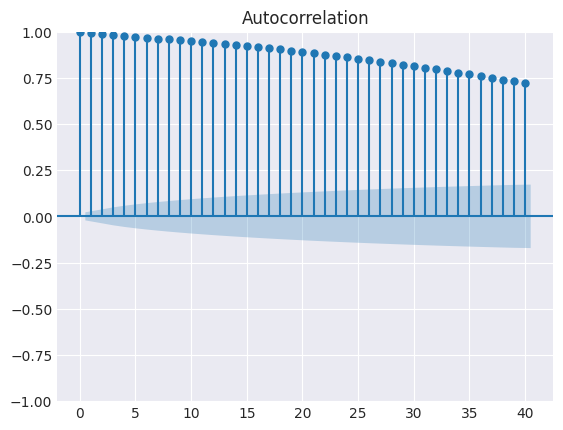

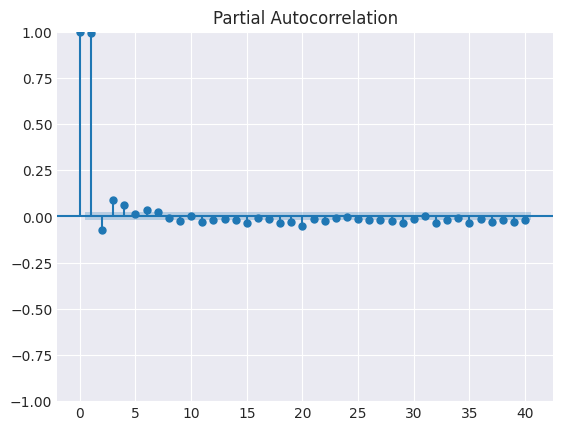

In [11]:
plot_acf(df)
plt.show()

plot_pacf(df)
plt.show()

In [12]:
adf = adfuller(df)
print('ADF Statistic: {}'.format(adf[0]))
print('p-value: {}'.format(adf[1]))
print('Critical Values:')
for key, value in adf[4].items():
  print('\t{}: {}'.format(key, value))

ADF Statistic: -7.435046052454736
p-value: 6.215199667368305e-11
Critical Values:
	1%: -3.4311678794719245
	5%: -2.8619014441120636
	10%: -2.5669623919996


In [6]:
def mape(y_pred, y_true):
  return (np.abs(y_pred - y_true)/y_true).mean() * 100

def mae(y_pred, y_true):
  return np.abs(y_pred - y_true).mean()

def mse(y_pred, y_true):
  return np.mean((np.array(y_true) - np.array(y_pred)) ** 2)

def rmse(y_pred, y_true):
  return np.sqrt(mse(y_pred, y_true))

from sklearn.metrics import r2_score

def r_squered(y_pred, y_true):
  return r2_score(y_true, y_pred)

In [7]:
display(df.head(3))
display(df.tail(3))

,temperature
2002-01-01,12.9000
2002-01-02,12.2000
2002-01-03,11.9000


,temperature
2023-12-29,15.3000
2023-12-30,14.4000
2023-12-31,14.3000


/home/lje/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/lje/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/lje/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


--- predict ---
2023-12-17   15.7824
2023-12-18   15.7546
2023-12-19   15.7140
2023-12-20   15.6894
2023-12-21   15.6698
2023-12-22   15.6464
2023-12-23   15.6352
2023-12-24   15.6352
2023-12-25   15.6222
2023-12-26   15.6124
2023-12-27   15.6152
2023-12-28   15.6241
2023-12-29   15.6268
2023-12-30   15.6239
2023-12-31   15.6204
Freq: D, Name: predicted_mean, dtype: float64
--- Evaluation Metrics ---
3.5293725036668313 0.5239843517334289 0.4252271208154392 0.6520944109677979 -1.3354264268028015


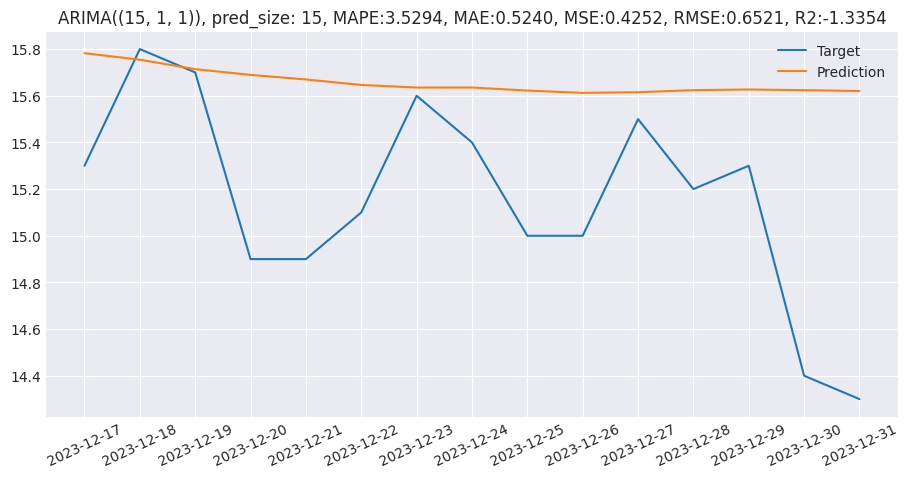

p: 15, d: 1, q: 1, pred_size: 15


/home/lje/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/lje/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/lje/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


--- predict ---
2023-12-17   15.8475
2023-12-18   15.8501
2023-12-19   15.8127
2023-12-20   15.8363
2023-12-21   15.8257
2023-12-22   15.7955
2023-12-23   15.7888
2023-12-24   15.8169
2023-12-25   15.7736
2023-12-26   15.7213
2023-12-27   15.7453
2023-12-28   15.7260
2023-12-29   15.6672
2023-12-30   15.6147
2023-12-31   15.5837
Freq: D, Name: predicted_mean, dtype: float64
--- Evaluation Metrics ---
4.098529385013048 0.6095435885191076 0.541340500408014 0.7357584524883244 -1.849887695633214


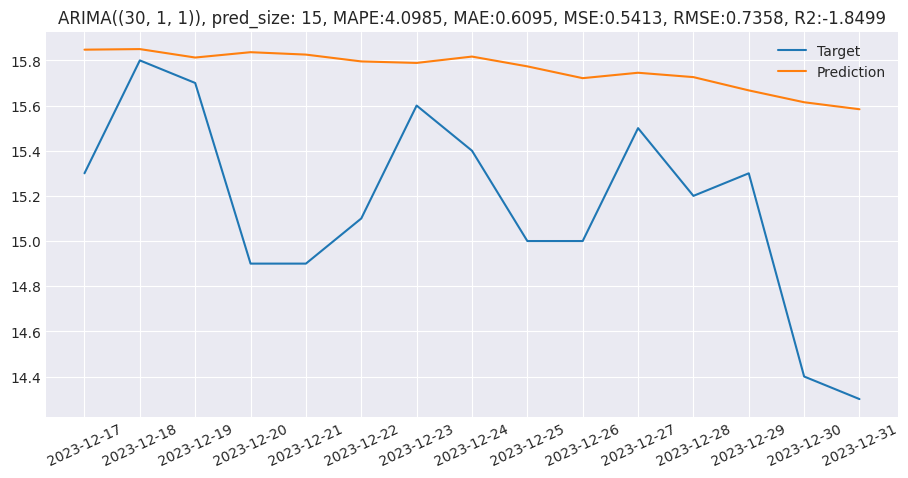

p: 30, d: 1, q: 1, pred_size: 15


/home/lje/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/lje/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/lje/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


--- predict ---
2023-12-17   15.7790
2023-12-18   15.6669
2023-12-19   15.5308
2023-12-20   15.4773
2023-12-21   15.3665
2023-12-22   15.2474
2023-12-23   15.2047
2023-12-24   15.1792
2023-12-25   15.1170
2023-12-26   15.0430
2023-12-27   15.0510
2023-12-28   14.9854
2023-12-29   14.8852
2023-12-30   14.8734
2023-12-31   14.8248
Freq: D, Name: predicted_mean, dtype: float64
--- Evaluation Metrics ---
2.693187728375944 0.4052026567218044 0.25831434317022955 0.508246341029849 0.2400105700939975


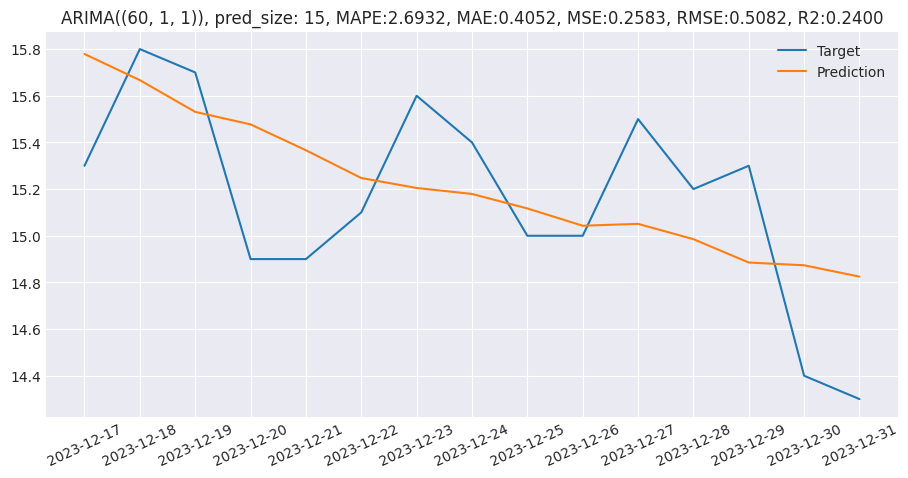

p: 60, d: 1, q: 1, pred_size: 15


/home/lje/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/lje/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/lje/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


--- predict ---
2023-12-17   15.7830
2023-12-18   15.7075
2023-12-19   15.6021
2023-12-20   15.5796
2023-12-21   15.4836
2023-12-22   15.3712
2023-12-23   15.3557
2023-12-24   15.3089
2023-12-25   15.2749
2023-12-26   15.2292
2023-12-27   15.2550
2023-12-28   15.2059
2023-12-29   15.1537
2023-12-30   15.1678
2023-12-31   15.1468
Freq: D, Name: predicted_mean, dtype: float64
--- Evaluation Metrics ---
2.664721455418587 0.3976708101203252 0.26096720632700426 0.5108494947898101 -0.03651698447897411


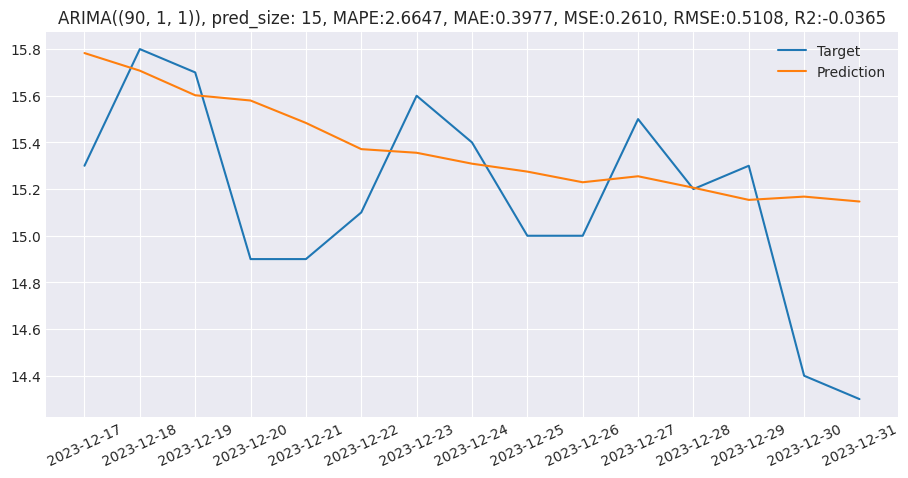

p: 90, d: 1, q: 1, pred_size: 15


/home/lje/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/lje/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/lje/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


--- predict ---
2023-12-17   15.7846
2023-12-18   15.7488
2023-12-19   15.6901
2023-12-20   15.6470
2023-12-21   15.6075
2023-12-22   15.5644
2023-12-23   15.5261
2023-12-24   15.4969
2023-12-25   15.4626
2023-12-26   15.4206
2023-12-27   15.3795
2023-12-28   15.3441
2023-12-29   15.3115
2023-12-30   15.2795
2023-12-31   15.2487
Freq: D, Name: predicted_mean, dtype: float64
--- Evaluation Metrics ---
2.962214749207012 0.44046163477620326 0.31793289725262136 0.563855386825932 -0.386356183509186


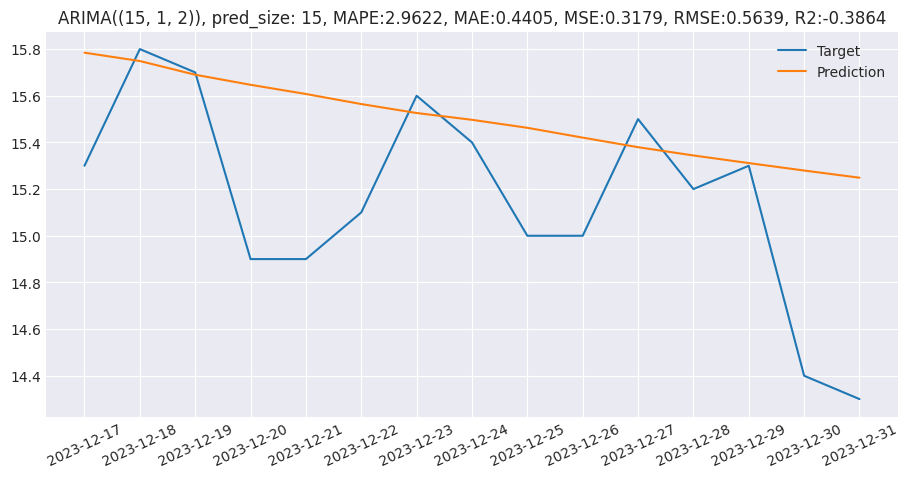

p: 15, d: 1, q: 2, pred_size: 15


/home/lje/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/lje/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/lje/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


--- predict ---
2023-12-17   15.7686
2023-12-18   15.6973
2023-12-19   15.5965
2023-12-20   15.5526
2023-12-21   15.4919
2023-12-22   15.4296
2023-12-23   15.3971
2023-12-24   15.4146
2023-12-25   15.3854
2023-12-26   15.3663
2023-12-27   15.3664
2023-12-28   15.3549
2023-12-29   15.3235
2023-12-30   15.2786
2023-12-31   15.2483
Freq: D, Name: predicted_mean, dtype: float64
--- Evaluation Metrics ---
2.7441932064356545 0.40823145822292495 0.27641468504234795 0.5257515430717707 -0.20923670398749716


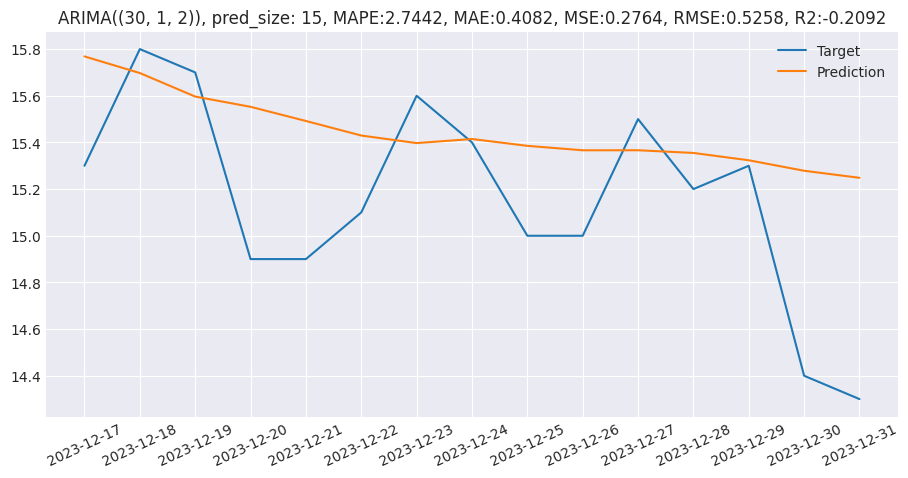

p: 30, d: 1, q: 2, pred_size: 15


/home/lje/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/lje/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/lje/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


--- predict ---
2023-12-17   15.7792
2023-12-18   15.6700
2023-12-19   15.5305
2023-12-20   15.4775
2023-12-21   15.3685
2023-12-22   15.2517
2023-12-23   15.2091
2023-12-24   15.1831
2023-12-25   15.1195
2023-12-26   15.0445
2023-12-27   15.0540
2023-12-28   14.9931
2023-12-29   14.8934
2023-12-30   14.8786
2023-12-31   14.8325
Freq: D, Name: predicted_mean, dtype: float64
--- Evaluation Metrics ---
2.686286076941343 0.4040931812512113 0.25759937828774293 0.5075424891452369 0.24047229469999243


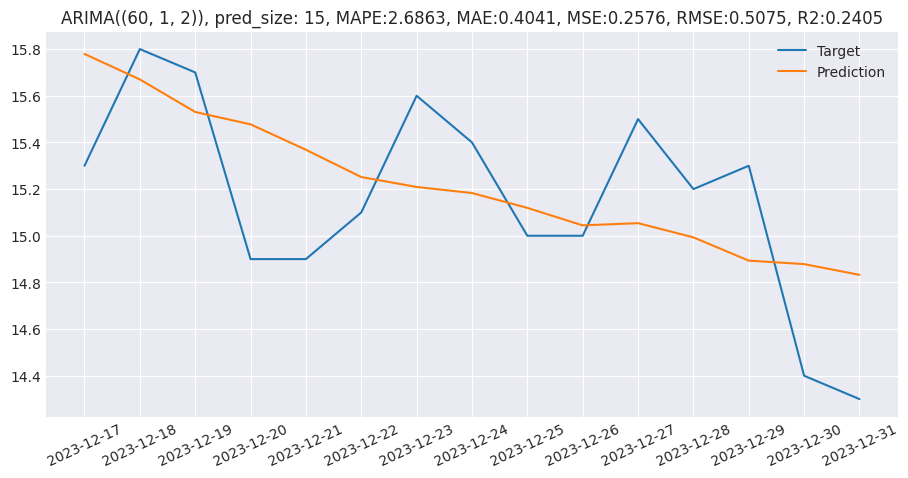

p: 60, d: 1, q: 2, pred_size: 15


/home/lje/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/lje/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/lje/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/lje/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


--- predict ---
2023-12-17   15.5820
2023-12-18   15.3252
2023-12-19   15.0475
2023-12-20   14.9025
2023-12-21   14.6578
2023-12-22   14.4400
2023-12-23   14.3110
2023-12-24   14.1898
2023-12-25   14.0228
2023-12-26   13.8848
2023-12-27   13.8060
2023-12-28   13.6714
2023-12-29   13.5163
2023-12-30   13.4559
2023-12-31   13.3437
Freq: D, Name: predicted_mean, dtype: float64
--- Evaluation Metrics ---
6.614986754627167 1.0094520957237338 1.4137770304985382 1.1890235617928429 -5.400422390232909


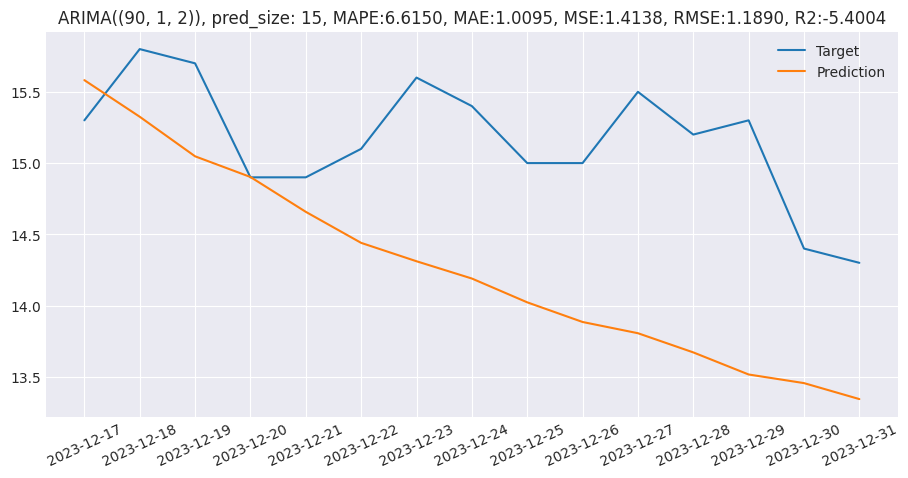

p: 90, d: 1, q: 2, pred_size: 15


/home/lje/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/lje/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/lje/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


--- predict ---
2023-12-02   17.7330
2023-12-03   17.7858
2023-12-04   17.7757
2023-12-05   17.7556
2023-12-06   17.8515
2023-12-07   17.9146
2023-12-08   17.9283
2023-12-09   17.9877
2023-12-10   18.0418
2023-12-11   18.0185
2023-12-12   18.0153
2023-12-13   18.0476
2023-12-14   18.0522
2023-12-15   18.0439
2023-12-16   18.0414
2023-12-17   18.0492
2023-12-18   18.0538
2023-12-19   18.0557
2023-12-20   18.0625
2023-12-21   18.0677
2023-12-22   18.0688
2023-12-23   18.0706
2023-12-24   18.0725
2023-12-25   18.0720
2023-12-26   18.0715
2023-12-27   18.0725
2023-12-28   18.0732
2023-12-29   18.0732
2023-12-30   18.0735
2023-12-31   18.0741
Freq: D, Name: predicted_mean, dtype: float64
--- Evaluation Metrics ---
14.461166190083603 2.2334577156488384 5.651950547040841 2.3773831300488446 -7.894076045091657


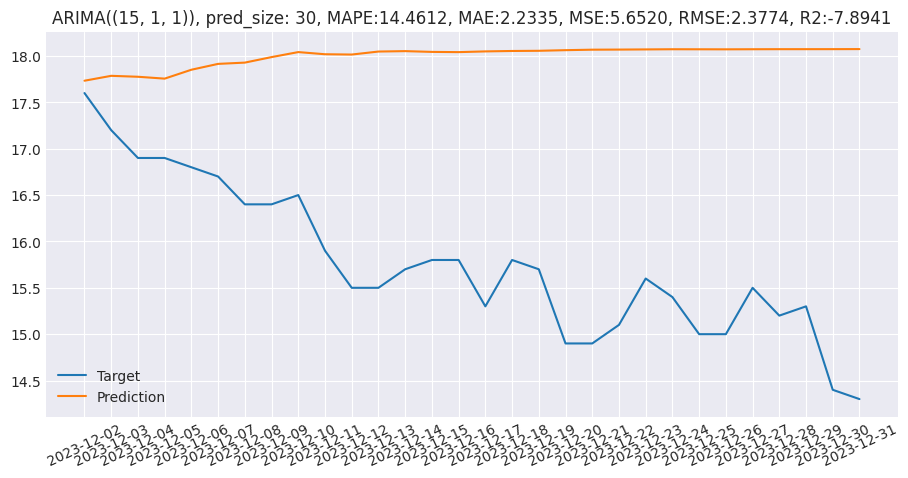

p: 15, d: 1, q: 1, pred_size: 30


/home/lje/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/lje/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/lje/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


--- predict ---
2023-12-02   17.6539
2023-12-03   17.6193
2023-12-04   17.5368
2023-12-05   17.4508
2023-12-06   17.5015
2023-12-07   17.5448
2023-12-08   17.5169
2023-12-09   17.5352
2023-12-10   17.5917
2023-12-11   17.5730
2023-12-12   17.6072
2023-12-13   17.6911
2023-12-14   17.7421
2023-12-15   17.7757
2023-12-16   17.7600
2023-12-17   17.8095
2023-12-18   17.8277
2023-12-19   17.8281
2023-12-20   17.8922
2023-12-21   17.9227
2023-12-22   17.9407
2023-12-23   17.9695
2023-12-24   18.0213
2023-12-25   18.0196
2023-12-26   17.9967
2023-12-27   18.0495
2023-12-28   18.0604
2023-12-29   18.0418
2023-12-30   18.0392
2023-12-31   18.0461
Freq: D, Name: predicted_mean, dtype: float64
--- Evaluation Metrics ---
13.103294586789954 2.0200492439978595 4.768185006747511 2.1836174130894612 -6.713838905766429


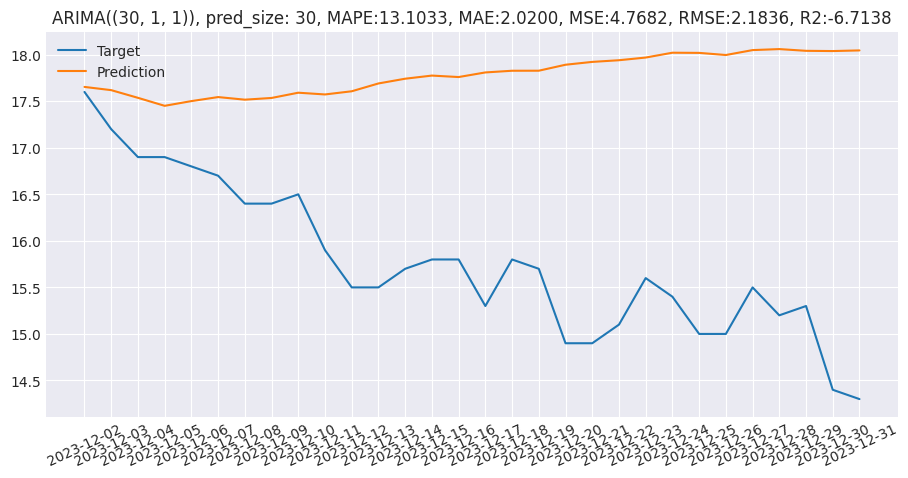

p: 30, d: 1, q: 1, pred_size: 30


/home/lje/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/lje/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/lje/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


--- predict ---
2023-12-02   17.5683
2023-12-03   17.4746
2023-12-04   17.2700
2023-12-05   17.1428
2023-12-06   17.1269
2023-12-07   17.0896
2023-12-08   16.9688
2023-12-09   16.9151
2023-12-10   16.9051
2023-12-11   16.7890
2023-12-12   16.7223
2023-12-13   16.7424
2023-12-14   16.7125
2023-12-15   16.6590
2023-12-16   16.5312
2023-12-17   16.5121
2023-12-18   16.4216
2023-12-19   16.3192
2023-12-20   16.2909
2023-12-21   16.2007
2023-12-22   16.1068
2023-12-23   16.0710
2023-12-24   16.0427
2023-12-25   15.9967
2023-12-26   15.9257
2023-12-27   15.9379
2023-12-28   15.8768
2023-12-29   15.7910
2023-12-30   15.8009
2023-12-31   15.7658
Freq: D, Name: predicted_mean, dtype: float64
--- Evaluation Metrics ---
6.618310304831615 1.0204782396185332 1.4962853732777532 1.2232274413524875 -0.11290043255994076


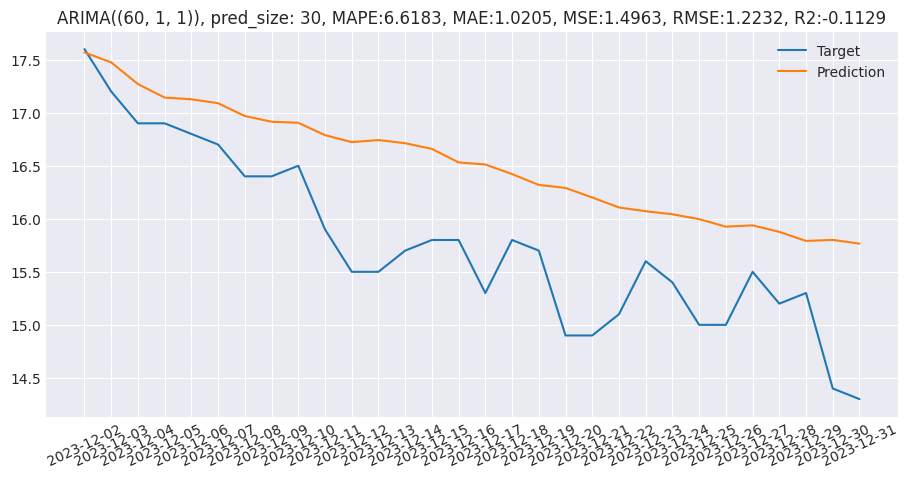

p: 60, d: 1, q: 1, pred_size: 30


/home/lje/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/lje/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/lje/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


--- predict ---
2023-12-02   17.5892
2023-12-03   17.4589
2023-12-04   17.2336
2023-12-05   17.0392
2023-12-06   16.9747
2023-12-07   16.9207
2023-12-08   16.7988
2023-12-09   16.7384
2023-12-10   16.7257
2023-12-11   16.5702
2023-12-12   16.4675
2023-12-13   16.4925
2023-12-14   16.4898
2023-12-15   16.4425
2023-12-16   16.3420
2023-12-17   16.3257
2023-12-18   16.2667
2023-12-19   16.1879
2023-12-20   16.1873
2023-12-21   16.1095
2023-12-22   16.0177
2023-12-23   16.0051
2023-12-24   15.9525
2023-12-25   15.9327
2023-12-26   15.8891
2023-12-27   15.9205
2023-12-28   15.8766
2023-12-29   15.8377
2023-12-30   15.8725
2023-12-31   15.8627
Freq: D, Name: predicted_mean, dtype: float64
--- Evaluation Metrics ---
6.186183141472801 0.9554924123445827 1.317024512060337 1.147616883833772 0.10889063051120651


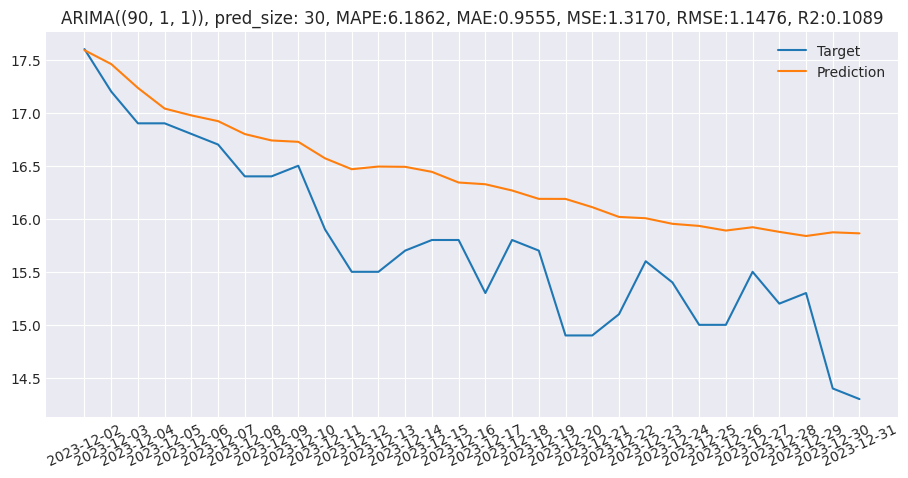

p: 90, d: 1, q: 1, pred_size: 30


,MAPE,MAE,MSE,RMSE,R2
order,,,,,
"(15, 1, 1, 15)",3.5294,0.5240,0.4252,0.6521,-1.3354
"(30, 1, 1, 15)",4.0985,0.6095,0.5413,0.7358,-1.8499
"(60, 1, 1, 15)",2.6932,0.4052,0.2583,0.5082,0.2400
"(90, 1, 1, 15)",2.6647,0.3977,0.2610,0.5108,-0.0365
"(15, 1, 2, 15)",2.9622,0.4405,0.3179,0.5639,-0.3864
"(30, 1, 2, 15)",2.7442,0.4082,0.2764,0.5258,-0.2092
"(60, 1, 2, 15)",2.6863,0.4041,0.2576,0.5075,0.2405
"(90, 1, 2, 15)",6.6150,1.0095,1.4138,1.1890,-5.4004
"(15, 1, 1, 30)",14.4612,2.2335,5.6520,2.3774,-7.8941


In [15]:
def fit_model_arima(p, d, q, pred_size):
    model = ARIMA(trn, order=(p, d, q)).fit()
    prd = model.predict(start=len(trn), end=len(trn) + (pred_size-1), dynamic=True)
    print('--- predict ---')
    print(prd)

    r1 = mape(prd.values , tst.values)
    r2 = mae(prd.values , tst.values)
    r3 = mse(prd.values , tst.values)
    r4 = rmse(prd.values , tst.values)
    r5 = r_squered(prd.values , tst.values)
    print('--- Evaluation Metrics ---')
    print(r1, r2, r3, r4, r5)

    result_list.append([(p, d, q, pred_size), r1, r2, r3, r4, r5])

    plt.figure(figsize=(11, 5))
    plt.title(f"ARIMA({p, d, q}), pred_size: {pred_size}, MAPE:{r1:.4f}, MAE:{r2:.4f}, MSE:{r3:.4f}, RMSE:{r4:.4f}, R2:{r5:.4f}")
    plt.plot(tst.index, tst, label="Target")
    plt.plot(tst.index, prd, label="Prediction")
    plt.xticks(rotation=30)
    plt.legend()
    plt.savefig('./fig/ARIMA_' + years + f'_result_{p, d, q, pred_size}.png')
    plt.show()

# Listed in p,d,q ordered pairs
# step_size == pred_size
ord_list = [[15, 1, 1, 15], [30, 1, 1, 15], [60, 1, 1, 15], [90, 1, 1, 15],
            [15, 1, 2, 15], [30, 1, 2, 15], [60, 1, 2, 15], [90, 1, 2, 15],
            [15, 1, 1, 30], [30, 1, 1, 30], [60, 1, 1, 30], [90, 1, 1, 30],
            [15, 1, 2, 30], [30, 1, 2, 30], [60, 1, 2, 30], [90, 1, 2, 30],
            [15, 1, 1, 60], [30, 1, 1, 60], [60, 1, 1, 60], [90, 1, 1, 60],
            [15, 1, 2, 60], [30, 1, 2, 60], [60, 1, 2, 60], [90, 1, 2, 60],
            [15, 1, 1, 90], [30, 1, 1, 90], [60, 1, 1, 90], [90, 1, 1, 90],
            [15, 1, 2, 90], [30, 1, 2, 90], [60, 1, 2, 90], [90, 1, 2, 90]]
result_list = []

for p, d, q, pred_size in ord_list:
    trn, tst = df[:-pred_size], df[-pred_size:]
    # display(trn.tail())
    # display(tst.tail())
    # len(trn), len(tst)
    fit_model_arima(p, d, q, pred_size)
    print(f'p: {p}, d: {d}, q: {q}, pred_size: {pred_size}')

pd.set_option('float_format', '{:.4f}'.format)
result_df = pd.DataFrame(result_list, columns=['order', 'MAPE', 'MAE', 'MSE', 'RMSE', 'R2'])
result_df.set_index('order', inplace=True)
result_df.to_csv('./result/ARIMA_result_' + years + '_all.csv')
result_df